 **Importing Libraries** 

In [32]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
%matplotlib inline
sns.set()

**Import all the .csv files at once**

In [33]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

**Clean up the file names that were imported**

In [34]:
# for loop cleaning the filenames
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") 
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df


**Assign Dataframe to Each File**

In [35]:
title_crew_df = csv_files_dict['imdb_title_crew_gz']
movies_df = csv_files_dict['tmdb_movies_gz']
title_akas_df = csv_files_dict['imdb_title_akas_gz']
title_ratings_df = csv_files_dict['imdb_title_ratings_gz']
name_basics_df = csv_files_dict['imdb_name_basics_gz']
title_basics_df = csv_files_dict['imdb_title_basics_gz']
movie_budgets_df = csv_files_dict['tn_movie_budgets_gz']
movie_gross_df = csv_files_dict['bom_movie_gross_gz']
title_principals_df = csv_files_dict['imdb_title_principals_gz']

**Analyze A Dataframe**

In [36]:
#get the type of the dataframe and describe the variables
type(movie_budgets_df)

pandas.core.frame.DataFrame

In [37]:
#show the chracteristics of the dataframe
movie_budgets_df.describe()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Home,"$20,000,000",$0,$0
freq,24,3,231,548,367


In [38]:
#look at the first five rows of the dataframe
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [39]:
#find out data types of each column to clean the dataframe
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


**Clean the Movie Budget Dataframe**

In [40]:
#converting production_budget, domestic_gross, and worldwide_gross from objects to int values
mb = movie_budgets_df
mb.production_budget = mb.production_budget.replace('[\$,]', '', regex=True).astype(int)
mb.domestic_gross = mb.domestic_gross.replace('[\$,]', '', regex=True).astype(int)
mb.worldwide_gross = mb.worldwide_gross.replace('[\$,]', '', regex=True).astype(int)

In [41]:
#check to see conversion
mb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [42]:
#drop the column i don't need 
mb.drop('worldwide_gross', axis=1, inplace=True)
#check to see if the column is dropped 
mb.head()  

,release_date,movie,production_budget,domestic_gross
id,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382


In [43]:
# clean data set by dropping NaN values
mb.dropna()

,release_date,movie,production_budget,domestic_gross
id,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382
...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000,0
79,"Apr 2, 1999",Following,6000,48482
80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338


**Graphing**

Text(0.5, 1.0, 'Scatter Plot of Profits v. Budgets')

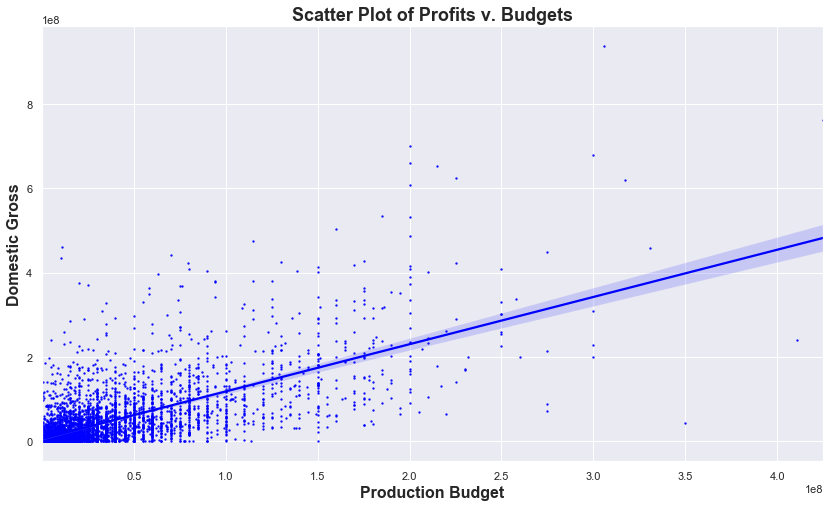

In [86]:
#Scatter Plot of Profits of Movies Compared to the Production Budget
plt.figure(figsize=(14,8))
l = sns.regplot(x =mb["production_budget"], y = mb["domestic_gross"], marker='o', color='blue', scatter_kws={'s':2})
plt.xlabel('Production Budget', fontsize=16, fontweight='bold')
plt.ylabel('Domestic Gross', fontsize=16, fontweight='bold')
plt.title('Scatter Plot of Profits v. Budgets', fontsize=18, fontweight='bold')


**Analyze This Data Further**

*I want to find the highest amount that can be made on a movie without
spending too much. 
Seeing that there are movies at high grossing movies at a median budget
of $2hundred million I will analyze the top 10 movies with the highest income percentages.*

In [45]:
# Choose the lines where the Production Budget is = $200,000,000
mb_prod_budg_2 = mb[mb.production_budget == 200000000]
# Sort this by largest domestic gross to least and display it
mb_prod_budg_2.sort_values(by= "domestic_gross", ascending = True) 

# check the data types
mb_prod_budg_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 42 to 63
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       22 non-null     object
 1   movie              22 non-null     object
 2   production_budget  22 non-null     int64 
 3   domestic_gross     22 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 880.0+ bytes


In [46]:
#Show the table
mb_prod_budg_2

,release_date,movie,production_budget,domestic_gross
id,,,,
42,"Feb 16, 2018",Black Panther,200000000,700059566
43,"Dec 19, 1997",Titanic,200000000,659363944
44,"Jun 15, 2018",Incredibles 2,200000000,608581744
45,"Dec 16, 2016",Rogue One: A Star Wars Story,200000000,532177324
46,"Jun 17, 2016",Finding Dory,200000000,486295561
47,"Jun 18, 2010",Toy Story 3,200000000,415004880
48,"May 3, 2013",Iron Man 3,200000000,408992272
49,"May 5, 2017",Guardians of the Galaxy Vol 2,200000000,389813101
50,"Jun 30, 2004",Spider-Man 2,200000000,373524485


In [47]:
# Create a column called Profit Percent which is calculated by dividing gross profits by the budget
mb_prod_budg_2['profit_percent'] = (mb_prod_budg_2.loc[:,'domestic_gross']/mb_prod_budg_2.loc[:,'production_budget'])*100
# Convert the data type of profit_percent to integers
mb_prod_budg_2.profit_percent = mb_prod_budg_2.profit_percent.replace('[\$,]', '', regex=True).astype(int)
# Show the newly formed dataframe
mb_prod_budg_2.head(10)

/Users/ArashPeimani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ArashPeimani/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,release_date,movie,production_budget,domestic_gross,profit_percent
id,,,,,
42,"Feb 16, 2018",Black Panther,200000000,700059566,350
43,"Dec 19, 1997",Titanic,200000000,659363944,329
44,"Jun 15, 2018",Incredibles 2,200000000,608581744,304
45,"Dec 16, 2016",Rogue One: A Star Wars Story,200000000,532177324,266
46,"Jun 17, 2016",Finding Dory,200000000,486295561,243
47,"Jun 18, 2010",Toy Story 3,200000000,415004880,207
48,"May 3, 2013",Iron Man 3,200000000,408992272,204
49,"May 5, 2017",Guardians of the Galaxy Vol 2,200000000,389813101,194
50,"Jun 30, 2004",Spider-Man 2,200000000,373524485,186


In [48]:
#check to see if it was converted
mb_prod_budg_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 42 to 63
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       22 non-null     object
 1   movie              22 non-null     object
 2   production_budget  22 non-null     int64 
 3   domestic_gross     22 non-null     int64 
 4   profit_percent     22 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.0+ KB


**Create a graph for our new column**

In [49]:
# top 10 of highest profits
top10 = mb_prod_budg_2.head(10)
top10

,release_date,movie,production_budget,domestic_gross,profit_percent
id,,,,,
42,"Feb 16, 2018",Black Panther,200000000,700059566,350
43,"Dec 19, 1997",Titanic,200000000,659363944,329
44,"Jun 15, 2018",Incredibles 2,200000000,608581744,304
45,"Dec 16, 2016",Rogue One: A Star Wars Story,200000000,532177324,266
46,"Jun 17, 2016",Finding Dory,200000000,486295561,243
47,"Jun 18, 2010",Toy Story 3,200000000,415004880,207
48,"May 3, 2013",Iron Man 3,200000000,408992272,204
49,"May 5, 2017",Guardians of the Galaxy Vol 2,200000000,389813101,194
50,"Jun 30, 2004",Spider-Man 2,200000000,373524485,186


Text(0, 0.5, 'profit_percent')

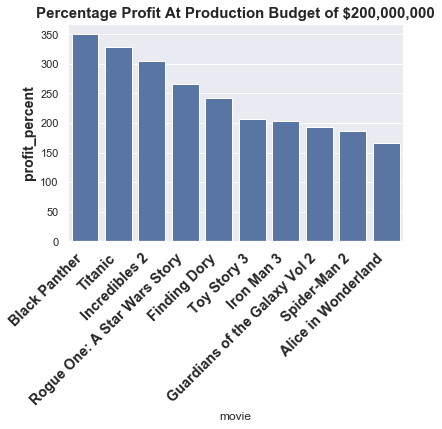

In [81]:
# Plot the graph
ax = sns.barplot(data = top10, x = 'movie', y = 'profit_percent', color='b', label = 'large')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right',
                  fontweight='bold', fontsize='large')
ax.set_title('Percentage Profit At Production Budget of $200,000,000', weight='bold', fontsize=15)
plt.ylabel('profit_percent', fontsize=14, weight='bold')


*The results indicate that movies that are using special effects, computer graphics and animation have a higher profit margin. 
We should look into the costs associated with using special effects.